<a href="https://colab.research.google.com/github/virati/DeepLearningForDynamics-Intuition/blob/class_ify/Dynamics_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Based on: https://github.com/TomJZ/DeepLearningForDynamics-Intuition/RNN_lorenz.ipynb

import torch
from torch import nn
import numpy as np
!pip install torchdiffeq
from torchdiffeq import odeint
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
class FixedPoint(nn.Module):
    def forward(self, t, y):
        return torch.mm(y**3, true_A)  # true system derivatives

class Lorenz(nn.Module):
  def __init__(self):
    super(Lorenz, self).__init__()
    self.lin = nn.Linear(5, 3, bias=False)
    W = torch.tensor([[-10., 10., 0., 0., 0.],
                      [28., -1., 0., -1., 0.],
                      [0., 0., -8. / 3., 0., 1.]])
    self.lin.weight = nn.Parameter(W)

  def forward(self, t, x):
      y = y = torch.ones([1, 5])
      y[0][0] = x[0][0]
      y[0][1] = x[0][1]
      y[0][2] = x[0][2]
      y[0][3] = x[0][0] * x[0][2]
      y[0][4] = x[0][0] * x[0][1]
      return self.lin(y)


In [ ]:
class dyn_sys:
  def __init__(self,sys_class = None):
    # system dynamics
    if sys_class is None:
      raise ValueError("Must specify a system class.")
    
    self.sys_class = sys_class
    self.data_size = 1000


  def run(self,y_0):
    true_y0 = y_0  # initial condition
    t = torch.linspace(0., 25., self.data_size).to(device)  # t is from 0 to 25 for 1000 data points
    true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]]).to(device)  # true system dynamics of fixed point

    with torch.no_grad():
        true_fixed_point = odeint(self.sys_class(), true_y0, t, method='dopri5')

    self.training_y = true_fixed_point

    return self

  def plot(self):
    true_y = self.training_y
    
    if true_y.shape[0] == 3:
      raise Warning("This is a 2d plotting function and there is 3d state.")

    fig = plt.figure(figsize=(12, 4), facecolor='white')
    ax_traj = fig.add_subplot(131, frameon=False)
    ax_phase = fig.add_subplot(132, frameon=False)
    ax_vecfield = fig.add_subplot(133, frameon=False)
    if true_y is not None:
        t = np.arange(len(true_y))
    
    ax_traj.set_title('Trajectories')
    ax_traj.set_xlabel('steps')
    ax_traj.set_ylabel('x,y')
    if true_y is not None:
        ax_traj.plot(t, true_y[:, 0, 0], t, true_y[:, 0, 1], 'g-', label="True")
    
    ax_traj.set_xlim(np.min(t), np.max(t))
    ax_traj.set_ylim(-2, 2)
    ax_traj.legend()

    ax_phase.set_title('Phase Portrait')
    ax_phase.set_xlabel('x')
    ax_phase.set_ylabel('y')
    if true_y is not None:
        ax_phase.plot(true_y[:, 0, 0], true_y[:, 0, 1], 'g-', label="True")
    
    ax_phase.set_xlim(-2, 2)
    ax_phase.set_ylim(-2, 2)
    ax_phase.legend()

    ax_vecfield.set_title('Learned Vector Field')
    ax_vecfield.set_xlabel('x')
    ax_vecfield.set_ylabel('y')

    fig.tight_layout()
    plt.show()

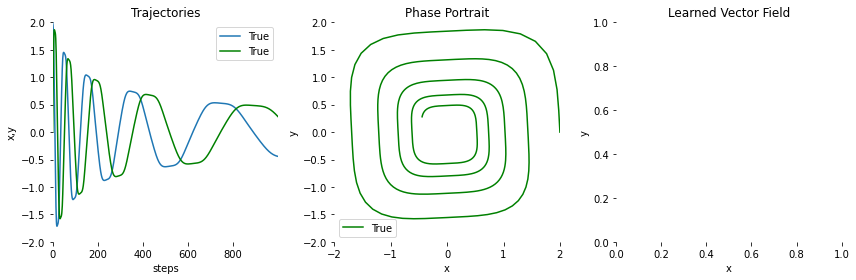

In [ ]:
sample_system = dyn_sys(sys_class=FixedPoint)
sample_system.run(y_0=torch.tensor([[2., 0.]]).to(device)).plot()


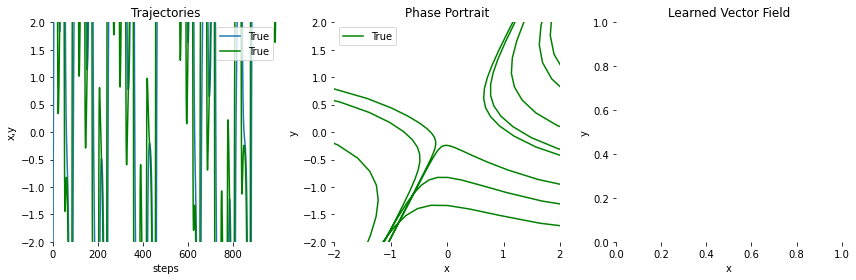

In [ ]:

sample_system = dyn_sys(sys_class=Lorenz)
sample_system.run(y_0=torch.tensor([[-8., 7., 27.]]).to(device)).plot()